# Survey Analysis Report
### Team Ford
Samantha Howard, Jyotsna Singh, Ishaan Pathak and Nick Mouaikel

# Sam's Analysis

## Abstract
Short summary about the data and what it tells you about your project. 

## Data input
In this section include code that reads in the csv file

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dist = pd.read_csv("2022_Project_distance_Matrix.csv")
dist.head()

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
0,7,4,9,8,3,0,6,2,5,1
1,0,1,3,2,4,8,6,5,7,9
2,3,2,1,6,0,8,5,4,7,9
3,8,7,3,9,4,5,0,6,1,2
4,0,2,1,8,7,3,9,6,4,5


In [3]:
# Team List
Teams =["ARFL","Argonne","Boeing","Delta Dental","Ford","Hope Village","Kellogg's","Neogen","Old Nation","Qside"]

# Broken up by team
#team = dist[dist['team'] == 0]
ARFL = dist[dist['ARFL'] == 0]
Argonne = dist[dist['Argonne'] == 0]

Boeing = dist[dist['Boeing'] == 0]
Delta = dist[dist['Delta Dental'] == 0]

Ford = dist[dist['Ford'] == 0] #6 members
Hope = dist[dist['Hope Village'] == 0]

Kellogg = dist[dist["Kellogg's"] == 0]
Neogen = dist[dist['Neogen'] == 0]

Old = dist[dist['Old Nation'] == 0]
Qside = dist[dist['Qside'] == 0] #2 members

## Data Cleaning
In this section provide code for converting the raw data into clean and usable data structures (if needed)

While there is no NA values there is a potental error in the collection of the data. As the team Qside had 2 entries, and Team ford had 6. And these are not the correct number of members for either.

In [4]:
#no missing entries
dist.isna().sum()

ARFL            0
Argonne         0
Boeing          0
Delta Dental    0
Ford            0
Hope Village    0
Kellogg's       0
Neogen          0
Old Nation      0
Qside           0
dtype: int64

## Data Modeling

In [5]:
corr = dist.corr()
corr

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
ARFL,1.000000,0.316525,0.361881,0.243643,0.061635,-0.577136,-0.211970,-0.017531,-0.474939,-0.494224
Argonne,0.316525,1.000000,0.483512,0.063318,0.157784,-0.434898,-0.338808,-0.141758,-0.436384,-0.557939
Boeing,0.361881,0.483512,1.000000,-0.146465,0.183945,-0.707230,-0.101455,0.156961,-0.505099,-0.659948
Delta Dental,0.243643,0.063318,-0.146465,1.000000,0.042934,-0.128369,-0.424887,-0.205687,-0.154399,-0.202978
Ford,0.061635,0.157784,0.183945,0.042934,1.000000,-0.410659,-0.120666,0.142023,-0.591787,-0.548476
Hope Village,-0.577136,-0.434898,-0.707230,-0.128369,-0.410659,1.000000,-0.041932,-0.293983,0.681481,0.728218
Kellogg's,-0.211970,-0.338808,-0.101455,-0.424887,-0.120666,-0.041932,1.000000,0.045035,-0.052038,0.211330
Neogen,-0.017531,-0.141758,0.156961,-0.205687,0.142023,-0.293983,0.045035,1.000000,-0.201630,-0.261360
Old Nation,-0.474939,-0.436384,-0.505099,-0.154399,-0.591787,0.681481,-0.052038,-0.201630,1.000000,0.635497
Qside,-0.494224,-0.557939,-0.659948,-0.202978,-0.548476,0.728218,0.211330,-0.261360,0.635497,1.000000


In [6]:
# bad, should change the groupby. Many "NA" values
summary = dist.groupby(Teams).size().unstack()

from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

pairwise = pd.DataFrame(
    squareform(pdist(summary)),
    columns = summary.index,
    index = summary.index)
#pairwise

## Data Visualization

This section make some graphs visualizing your results.  A distance matrix and/or network graph may be cool.  Think though the best way to show what you learned.

Here using Seaborn, it isn't isn't a distance matrix but I thought the visualization could be intresting. I was courious if it could just give a quick glance at the general likness of the projects to another. I would not recommend this model.<br>
The easist way to understand this visulization is the paler the color, the more similar the two groups are. The Darker the blue/red is is the more differnet they are.

<AxesSubplot:>

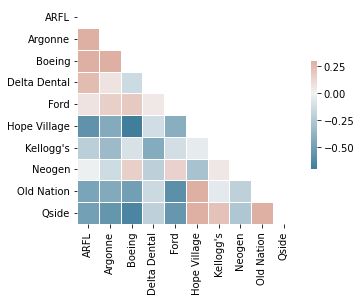

In [7]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#closer to white is more similar to each other. Stronger color is less similar.

## Conclusion

This should be similar to the abstract but with more details. What can you conclude about your project from this data?

## Sources
[Pairwise Distance Matrix Tutoral](https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html)<br>
[Seaborn Correlation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# Jyotsna's Analysis

In [8]:
data = pd.read_csv("2022_Project_distance_Matrix.csv")

## Disagrement 

The heatmap below shows how much the people on a team agreed or disagreed on which projects were similar to their own. The darker colors mean higher disagreemnent and lighter colors mean lower disagreemnet.

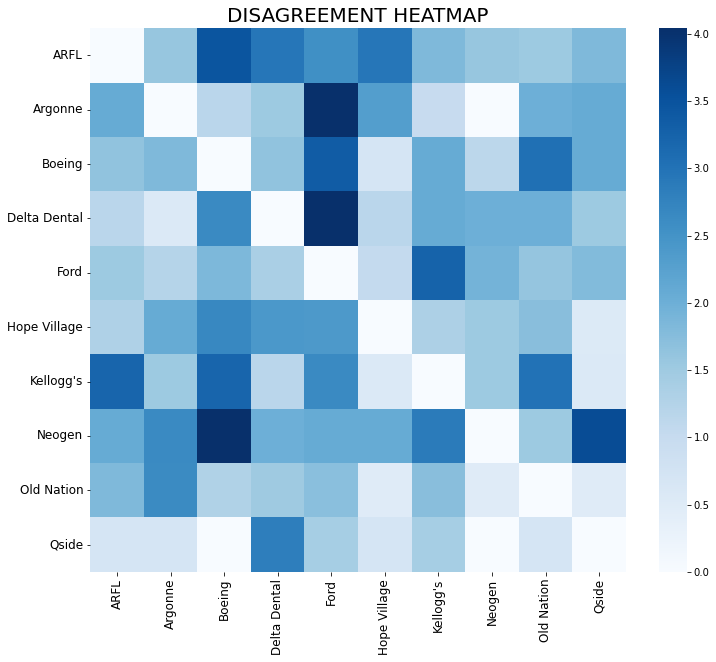

In [9]:
temp = {}

for a in data.columns.values:
    df = data[data[a] == 0]
    #temp[a] = np.array(df.sum(0)/df.shape[0])
    temp[a] = df.std(axis=0)
    
prob_matrix = pd.DataFrame(temp).T.fillna(0)

plt.figure(figsize=(12,10))
sns.heatmap(prob_matrix, cmap="Blues")
plt.title("DISAGREEMENT HEATMAP", fontsize = 20);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12, rotation=360);

# Ishaan's Analysis

In [10]:
import numpy as np
import scipy as sc
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [11]:
data = pd.read_csv('2022_Project_distance_Matrix.csv')
ARFL = data[data['ARFL'] == 0]
ARFL

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
1,0,1,3,2,4,8,6,5,7,9
4,0,2,1,8,7,3,9,6,4,5
14,0,4,1,7,2,8,5,3,6,9
18,0,5,9,2,1,3,8,4,7,6
22,0,3,1,7,6,9,5,2,4,8


In [12]:
team_wise_data = pd.DataFrame(data=[], columns=data.columns)
for i in data.columns:
    temp_team = data[data[i] == 0]
    team_wise_data = pd.concat([team_wise_data, temp_team])

In [13]:
team_wise_data.head()

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
1,0,1,3,2,4,8,6,5,7,9
4,0,2,1,8,7,3,9,6,4,5
14,0,4,1,7,2,8,5,3,6,9
18,0,5,9,2,1,3,8,4,7,6
22,0,3,1,7,6,9,5,2,4,8


<AxesSubplot:>

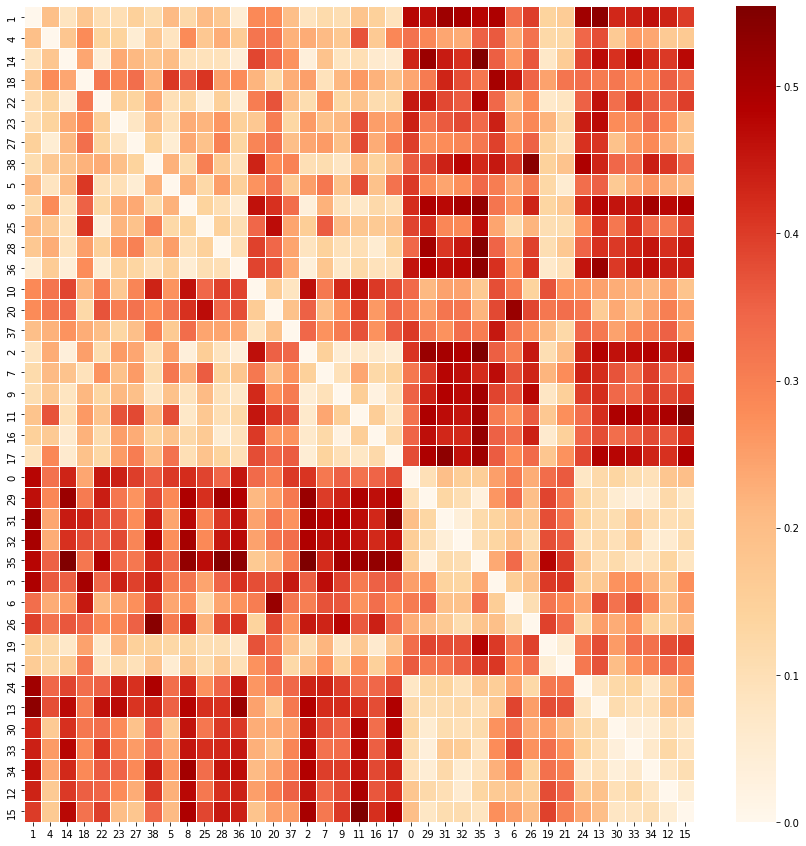

In [14]:
pairwise_top = pd.DataFrame(squareform(pdist(team_wise_data, metric='cosine')),
                            columns = team_wise_data.index,
                            index = team_wise_data.index)

plt.figure(figsize=(15,15))
sns.heatmap(pairwise_top, cmap='OrRd', linewidth=1)

# Nick's Analysis

In [15]:
import pandas as pd 
import numpy as np
from scipy.spatial import distance_matrix
import sympy as sym
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sympy'

In [ ]:
data = pd.read_csv('2022_Project_distance_Matrix.csv',header='infer')
data.head()

In [ ]:
dist_mat = distance_matrix(data.T,data.T,p=2)
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(dist_mat,annot=True)

In [ ]:
np.dot(data.T,data)